In [1]:
import pandas as pd
import pickle as pkl
import os

In [17]:
path = os.path.join(os.getcwd(), "data")
files = os.listdir(path)
file_column, language_column = [], []
for file in files:
    if file[-3:] == "pkl":
        try:
            with open(path+"/"+file,'rb') as f:
                curr_dict = pkl.load(f)
                print(file,curr_dict)
                for key,value in curr_dict.items():
                    file_column.append(key)
                    language_column.append(value)
        
        except TypeError:
            pass

predictions_dict.pkl {'acoruna_barco_m67780_a84524_audio_converted.mp3': 'Galician', 'barcelona_Ovvero_m68255_a84999_audio_converted.mp3': 'Bosnian', 'berlin_Dirk_m67384_a84128_audio_converted.mp3': 'German'}


In [18]:
db = pd.DataFrame.from_dict({"file":file_column,"language":language_column})
db

,file,language
0,acoruna_barco_m67780_a84524_audio_converted.mp3,Galician
1,barcelona_Ovvero_m68255_a84999_audio_converted...,Bosnian
2,berlin_Dirk_m67384_a84128_audio_converted.mp3,German


In [19]:
db['language'].unique()

array(['Galician', 'Bosnian', 'German'], dtype=object)

In [20]:
x, y = [], []
for i,j in zip(db['language'].value_counts().index, db['language'].value_counts()):
    x.append(j)
    y.append(i)

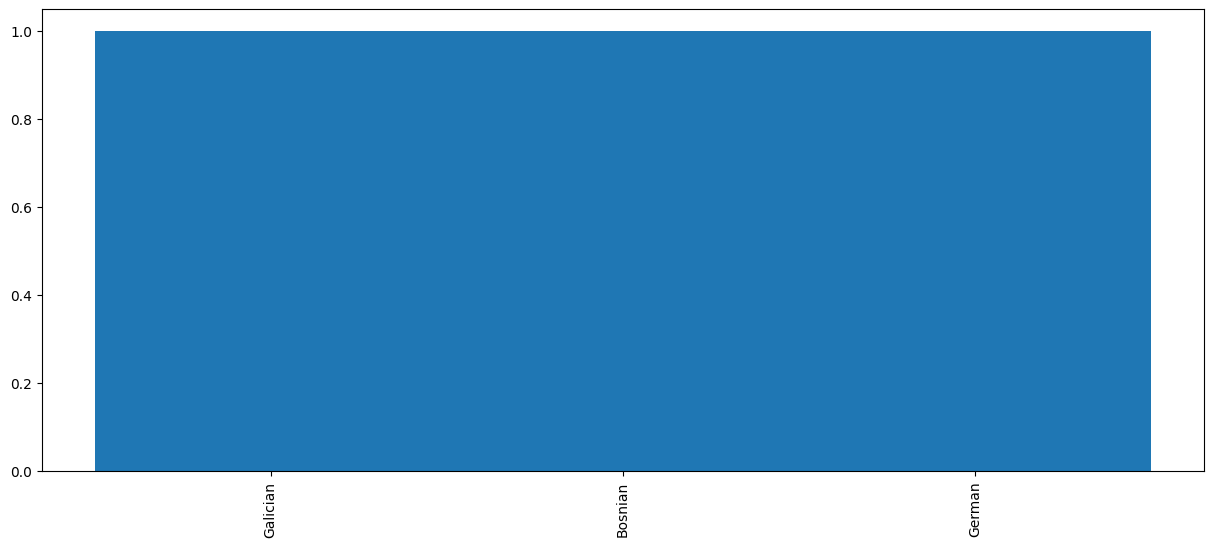

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(y, x, width = 1)
plt.xticks(rotation=90)
plt.show()

There are too many languages with close to zero values, they could be removed and a numbre should be decided in the future. For testing I set it to -1 to pick everything

In [23]:
languages_to_use = []
for i,j in zip(db['language'].value_counts().index, db['language'].value_counts()):
    if j > -1:
        languages_to_use.append(i)
languages_to_use

['Galician', 'Bosnian', 'German']

In [24]:
db.loc[db['language'].isin(languages_to_use)]

,file,language
0,acoruna_barco_m67780_a84524_audio_converted.mp3,Galician
1,barcelona_Ovvero_m68255_a84999_audio_converted...,Bosnian
2,berlin_Dirk_m67384_a84128_audio_converted.mp3,German


In [25]:
db.to_csv(path+"/"+"file_language.csv")